# Pipeline

In [2]:
import pandas as pd
from seaborn import heatmap

In [3]:
df = pd.read_csv('data/genre_data_clean.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,year,genre
0,0.507,0.7100,5,-5.020,1,0.0291,0.0975,0.000011,0.170,0.450,134.647,audio_features,14J3PO0VnhtcRa31r7Aj1L,spotify:track:14J3PO0VnhtcRa31r7Aj1L,https://api.spotify.com/v1/tracks/14J3PO0Vnhtc...,https://api.spotify.com/v1/audio-analysis/14J3...,273573,4,1999,acoustic
1,0.496,0.3780,11,-7.878,1,0.0336,0.8980,0.000001,0.109,0.335,144.092,audio_features,2SZDu4esDLUISRnpYQE17b,spotify:track:2SZDu4esDLUISRnpYQE17b,https://api.spotify.com/v1/tracks/2SZDu4esDLUI...,https://api.spotify.com/v1/audio-analysis/2SZD...,277667,3,1999,acoustic
2,0.760,0.7650,0,-9.319,1,0.0352,0.2890,0.000008,0.233,0.868,107.602,audio_features,5E2EpolcGmcbYpsv0z6jAZ,spotify:track:5E2EpolcGmcbYpsv0z6jAZ,https://api.spotify.com/v1/tracks/5E2EpolcGmcb...,https://api.spotify.com/v1/audio-analysis/5E2E...,226933,4,1999,acoustic
3,0.607,0.1960,1,-19.705,1,0.0595,0.9040,0.727000,0.111,0.187,111.031,audio_features,5RVEXH7OR9rcRz7eeviOzc,spotify:track:5RVEXH7OR9rcRz7eeviOzc,https://api.spotify.com/v1/tracks/5RVEXH7OR9rc...,https://api.spotify.com/v1/audio-analysis/5RVE...,223948,4,1999,acoustic
4,0.497,0.0919,3,-15.685,1,0.0704,0.9680,0.002140,0.133,0.548,206.431,audio_features,7CNaYAdLyi86kofGafReiT,spotify:track:7CNaYAdLyi86kofGafReiT,https://api.spotify.com/v1/tracks/7CNaYAdLyi86...,https://api.spotify.com/v1/audio-analysis/7CNa...,139693,4,1999,acoustic


In [4]:
df['key'] = df['key'].astype("category")
df['mode'] = df['mode'].astype("category")
df['time_signature'] = df['time_signature'].astype("category")
df['genre'] = df['genre'].astype("category")

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=43)
for train_index, test_index in split.split(df, df["genre"]):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

In [15]:
X = strat_train.drop('genre', axis=1)
y = strat_train[['genre']]

In [34]:
X_test = strat_test.drop('genre', axis=1)
y_test = strat_test[['genre']]

<AxesSubplot:>

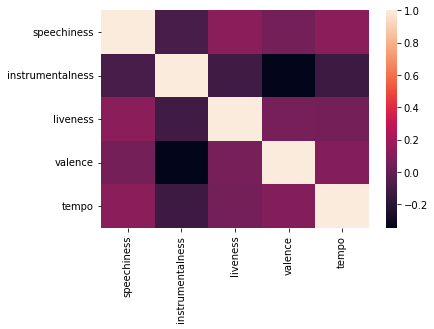

In [54]:
heatmap(df.drop(['duration_ms','year','energy','acousticness','loudness','danceability'], axis=1).corr())

array([[<AxesSubplot:xlabel='speechiness', ylabel='speechiness'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='speechiness'>,
        <AxesSubplot:xlabel='liveness', ylabel='speechiness'>,
        <AxesSubplot:xlabel='valence', ylabel='speechiness'>,
        <AxesSubplot:xlabel='tempo', ylabel='speechiness'>],
       [<AxesSubplot:xlabel='speechiness', ylabel='instrumentalness'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='instrumentalness'>,
        <AxesSubplot:xlabel='liveness', ylabel='instrumentalness'>,
        <AxesSubplot:xlabel='valence', ylabel='instrumentalness'>,
        <AxesSubplot:xlabel='tempo', ylabel='instrumentalness'>],
       [<AxesSubplot:xlabel='speechiness', ylabel='liveness'>,
        <AxesSubplot:xlabel='instrumentalness', ylabel='liveness'>,
        <AxesSubplot:xlabel='liveness', ylabel='liveness'>,
        <AxesSubplot:xlabel='valence', ylabel='liveness'>,
        <AxesSubplot:xlabel='tempo', ylabel='liveness'>],
       [<AxesSubplot:

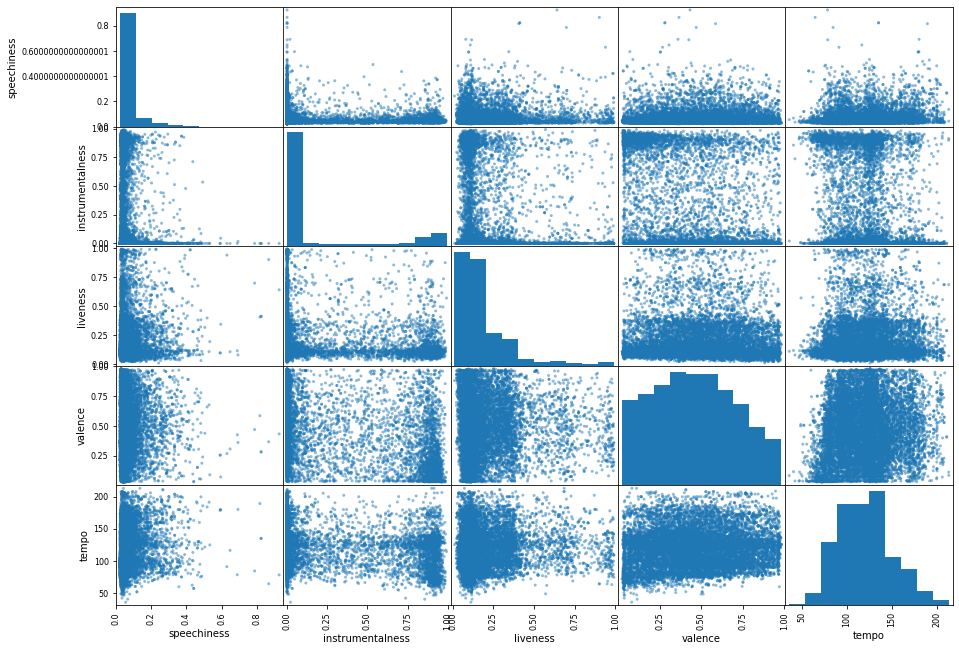

In [55]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.drop(['duration_ms','year','energy','acousticness','loudness','danceability'], axis=1), figsize=(15,11));

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
ct = ColumnTransformer([
    ('step_1', MinMaxScaler(), ['danceability','energy', 'loudness', 
                                'speechiness','acousticness', 'instrumentalness',
                                'liveness','valence', 'tempo'
                               ]),
    ('step_2', OneHotEncoder(sparse=False), ['key', 'mode', 'time_signature'])
])

<AxesSubplot:>

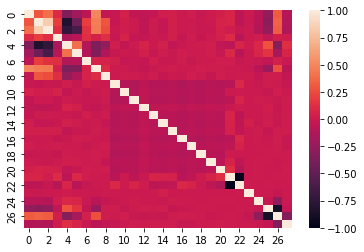

In [23]:
xx=ct.fit_transform(X)
heatmap(pd.DataFrame(xx).corr())

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
p = Pipeline([
    ('step_1', ct),
    ('step_2', DecisionTreeClassifier())
])

In [25]:
p.fit(X,y)

Pipeline(steps=[('step_1',
                 ColumnTransformer(transformers=[('step_1', MinMaxScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo']),
                                                 ('step_2',
                                                  OneHotEncoder(sparse=False),
                                                  ['key', 'mode',
                                                   'time_signature'])])),
                ('step_2', DecisionTreeClassifier())])

In [33]:
from sklearn.model_selection import cross_val_score
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
cross_val_score(tree_clf, xx, y_enc, cv=10)

array([0.353125  , 0.31458333, 0.35833333, 0.35625   , 0.33125   ,
       0.35416667, 0.321875  , 0.38541667, 0.33958333, 0.34791667])

In [28]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_enc = ohe.fit_transform(y)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
cross_val_score(tree_clf, xx, y_enc, cv=10)

array([0.353125  , 0.33958333, 0.36354167, 0.35520833, 0.34375   ,
       0.32916667, 0.328125  , 0.375     , 0.328125  , 0.35833333])

array([[0.45397308, 0.5452237 , 0.82892827, ..., 0.        , 1.        ,
        0.        ],
       [0.20755536, 0.25873466, 0.68937675, ..., 1.        , 0.        ,
        0.        ],
       [0.22926617, 0.15355512, 0.59741215, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.20104212, 0.00784639, 0.29874696, ..., 0.        , 1.        ,
        0.        ],
       [0.45614416, 0.06330105, 0.47909896, ..., 0.        , 1.        ,
        0.        ],
       [0.62983066, 0.62135365, 0.89977719, ..., 0.        , 1.        ,
        0.        ]])